# Random variables

A **random variable** is a function $\xi \colon \Omega \to \mathbb R$ where $\Omega$ is the set of [events](https://en.wikipedia.org/wiki/Event_(probability_theory)) or outcomes. It is also called **support** of $\xi$.
Depending on their support $\Omega$ all random variables of practical interest are divided into two big groups: **discrete** and **continuous**.

A lot of useful tools for working with discrete and continuous distributions can be found in [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

## Discrete distributions

All discrete random variables have either finite of countable support:

$$
    \Omega = \{x_1, \ldots, x_n\} \text{ or } \Omega = \{x_k\}_{k=1}^\infty. 
$$

A discrete random variable $\xi$ is defined by its **probability mass function** (**pmf**):

$$
    p_k = \mathbb P(\xi = x_k).
$$

Every pmf must satisfy the following conditions:

$$
    p_k \geqslant 0, \quad \sum\limits_k p_k = 1.
$$

**Cumulative distribution function** (**cdf**) is 

$$
F_\xi(x) = \mathbb P(\xi \leqslant x) = \sum\limits_{k\leqslant x} p_k.
$$

### Measures of central tendency

Let $\xi$ be a discrete random variable.

**Expectation** (**mean**) of $\xi$ is

$$
\mathbb E\xi = \sum\limits_{k} x_k \mathbb P(\xi = x_k) = \sum\limits_{k} p_k x_k.
$$

Expectation is a linear operation: $\mathbb E(a\xi + b\eta) = a \mathbb E \xi + b \mathbb E \eta$.

**Variance** of $\xi$ is

$$
    \mathbb V\xi = \mathbb E\big(\xi - \mathbb E\xi\big)^2 = \mathbb E\xi^2 - (\mathbb E\xi)^2 = \sum\limits_{k} x_k^2 p_k - \Big(\sum\limits_{k} p_k x_k\Big)^2.
$$

Note that $\mathbb V\xi \geqslant 0$ for all $\xi$.

```{admonition} Question
:class: important
In which cases the equality $\mathbb V \xi = 0$ is possible?
```

````{admonition} Is variance linear?
:class: important
Does the equality $\mathbb V(a\xi + b\eta) = a \mathbb V \xi + b \mathbb V \eta$ hold?

```{admonition} Answer
:class: dropdown, tip
Almost never. The correct formula is

$$
    \mathbb V(a\xi + b\eta) = a^2 \mathbb V \xi  + b^2 \mathbb V \eta + 2ab\mathrm{cov}(\xi, \eta),
$$

where $\mathrm{cov}(\xi, \eta) = \mathbb E(\xi - \mathbb E\xi)(\eta - \mathbb E\eta)$.
```
````

**Standard deviation** is equal to the square root of variance: $\mathrm{sd}(\xi) = \sqrt{\mathbb V\xi}$.

**Median** of $\xi$ is defined as such number $m$ for which

$$
\mathbb P(\xi \leqslant m) \geqslant \frac 12, \quad \mathbb P(\xi \geqslant m) \geqslant \frac 12.
$$

**Mode** of $\xi$ is the point of maximum of its pmf:

$$
\mathrm{mode}(\xi) = \underset{k}{\operatorname{argmax}} \mathbb P(\xi = x_k).
$$

### Bernoulli distribution

Bernoulli trial has two outcomes: $\Omega = \{0, 1\}$, $0$ = «failure», $1$ = «success»,

$$
    \mathbb P(\text{«success»}) = p, \quad \mathbb P(\text{«failure»}) = 1 - p, \quad 0 \leqslant p \leqslant 1.
$$

A typical example of a Bernoulli trial is tossing a coin. If the coin is fair then $p=\frac 12$.

```{admonition} Is a real coin fair?
:class: dropdown
According to the [recent studies](https://arxiv.org/abs/2310.04153), probability of landing on the same side is $0.508$.
```

**Bernoulli** random variable $\xi \sim \mathrm{Bern}(p)$ is indicator of success:

$$
    \mathbb P(\xi = 1) = p, \quad \mathbb P(\xi = 0) = 1 - p.
$$

If $\xi \sim \mathrm{Bern}(p)$, then

$$
    \mathbb E \xi = p, \quad \mathbb V \xi = p(1 - p).
$$

In machine learning Bernoulli distribution models outputs of all binary classifiers.

Bernoulli sampling in `scipy`:

In [72]:
from scipy.stats import bernoulli
bernoulli.rvs(0.3, size=15)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [63]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'

def plot_measures(rv, xs, title, y_max=None):
    means = rv.mean()
    vars = rv.var()
    stds = rv.std()
    medians = rv.median()
    plt.plot(xs, means, lw=2, c='r', label="mean")
    plt.plot(xs, vars, lw=2, c='b', label="variance")
    plt.plot(xs, stds, lw=2, c='g', label="std")
    plt.plot(xs, medians, lw=2, c='m', label="median")
    plt.xlim(xs.min(), xs.max())
    if y_max is not None:
        plt.ylim(0, y_max)
    plt.xlabel(r"$p$")
    plt.legend()
    plt.grid(ls=":")
    plt.title(title);

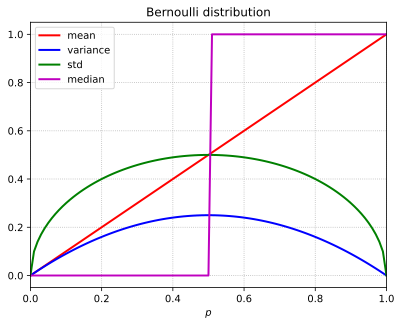

In [44]:
ps = np.linspace(0, 1, num=101)
plot_measures(bernoulli(ps), ps, "Bernoulli distribution")

### Binomial distribution

The number of successes in $n$ independent Bernoulli trials is called **binomial** random variable: $\xi \sim \mathrm{Bin}(n, p)$ if 

$$
    \xi = \xi_1 + \ldots + \xi_n, \quad \xi_k \sim \mathrm{Bern}(p).
$$

The pmf of $\xi \sim \mathrm{Bin}(n, p)$ is

$$
    p_k = \mathbb P(\xi = k) = \binom nk p^k (1-p)^k, \quad 0  \leqslant k \leqslant n.
$$

Due to the [binomial theorem](https://en.wikipedia.org/wiki/Binomial_theorem) this is a correct probability distribution, since

$$
    \sum\limits_{k=0}^n\binom nk p^k (1-p)^k = (p + 1 - p)^n = 1.
$$

If $\xi \sim \mathrm{Bin}(n, p)$ then

$$
    \mathbb E \xi = np,\quad \mathbb V\xi = np(1-p).
$$

In [50]:
from scipy.stats import binom
binom.rvs(10, 0.5, size=15)

array([5, 5, 3, 2, 4, 5, 7, 4, 8, 6, 5, 4, 5, 7, 3])

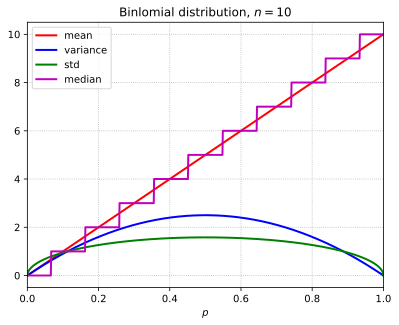

In [48]:
n = 10
ps = np.linspace(0, 1, num=1001)
plot_measures(binom(n, ps), ps, r"Binlomial distribution, $n = {}$".format(n))

### Geometric distribution

The number of independent Bernoulli trials before first success is called **geometric** random variable. Hence, $\xi \sim \mathrm{Geom}(p)$ if

$$
    p_k = \mathbb P(\xi = k) = q^{k-1} p, \quad q = 1-p,  \quad k\in\mathbb N.
$$

Note that geometric distribution has countable support. Since $\sum\limits_{k=1}^\infty q^{k-1} = \frac 1{1-q} = \frac 1p$  if $ 0 < q < 1$, all probabilities $p_k$ are summed up to $1$.

If $\xi \sim \mathrm{Geom}(p)$ then

$$
    \mathbb E \xi = \frac 1p, \quad \mathbb V\xi = \frac{1-p}{p^2}.
$$

In [58]:
from scipy.stats import geom
print("High success probability:")
print(geom.rvs(0.8, size=15))
print("Low success probability:")
print(geom.rvs(0.1, size=15))

High success probability:
[1 2 1 1 1 1 1 1 1 1 4 1 1 2 2]
Low success probability:
[ 9  1  2  2  8  7 10  4 12  4  2 14 56 10  5]


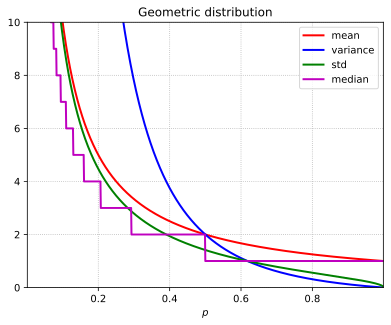

In [68]:
ps = np.linspace(0.001, .999, num=999)
plot_measures(geom(ps), ps, "Geometric distribution", y_max=10)

### Poisson distribution

A random variable $\xi$ has **Poisson** distribution $\mathrm{Pois}(\lambda)$, $\lambda > 0$, if

$$
    p_k = \mathbb P(\xi = k) = \frac{\lambda ^k}{k!} e^{-\lambda}, \quad k \in \mathbb N \cup \{0\}.
$$

If $\xi \sim \mathrm{Pois}(\lambda)$ then

$$
    \mathbb E \xi = \lambda, \quad \mathbb V\xi = \lambda.
$$

In [70]:
from scipy.stats import poisson
poisson.rvs(10, size=15)

array([19,  8, 11, 12, 12, 10,  9, 14,  7,  9, 10, 10, 11,  7,  4])

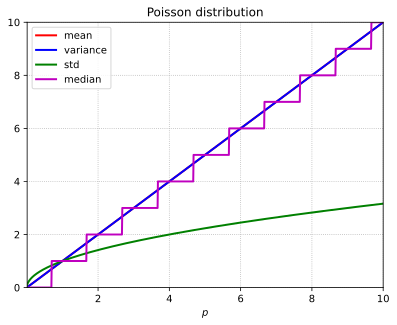

In [74]:
ps = np.linspace(0.01, 10, num=1000)
plot_measures(poisson(ps), ps, "Poisson distribution", y_max=10)

In some cases Poisson distribution can serve as an approximation to binomial one.

```{prf:theorem} Poisson
:label: poisson-approx
:nonumber:
Let $\xi \sim \mathrm{Bin}(n, p_n)$ and $\lim\limits_{n \to \infty} np_n = \lambda > 0$. Then

$$
  \lim\limits_{n \to \infty} \mathbb{P}(\xi = k) =  e^{-\lambda} \frac{\lambda^k}{k!}, \quad k \in \mathbb N \cup \{0\}
$$

In other words,

$$
    \mathrm{Bin}(n, p_n) \stackrel{D}{\to} \mathrm{Pois}(\lambda) \text { if } np_n \to \lambda.
$$
```

## Continuous distributions

The support $\Omega$ of a continuous random variable $\xi$ is usually a subset of $\mathbb R$. In this case $\xi$ is specified by its **probability density function** (**pdf**) $p_\xi(x)$ such that

$$
    \quad \mathbb P(\xi \in [a, b]) = \int\limits_a^b p_\xi(x)\, dx.
$$

Any pdf must be nonnegative and $\int\limits_{-\infty}^\infty p_\xi(x)\, dx = 1$. Also,

$$
    F_\xi(x) = \mathbb P(\xi \leqslant x) = \int\limits_{-\infty}^x p_\xi(t)\,dt,
$$

and, consequently, the derivative of cdf is equal to pdf: $F_\xi'(x) = p_\xi(x)$.

### Measures of central tendency

Let $\xi$ be a continuous random variable whose pdf is $p_\xi(x)$.

**Expectation** (**mean**) of $\xi$ is

$$
\mathbb E\xi = \int\limits_{-\infty}^{\infty} xp_\xi(x)\,dx
$$

**Variance** of $\xi$ is

$$
    \mathbb V\xi = \mathbb E\big(\xi - \mathbb E\xi\big)^2 = \mathbb E\xi^2 - (\mathbb E\xi)^2 = \int\limits_{-\infty}^{\infty} x^2p_\xi(x)\,dx - \Big(\int\limits_{-\infty}^{\infty} xp_\xi(x)\,dx\Big)^2.
$$


**Standard deviation** is equal to the square root of variance: $\mathrm{sd}(\xi) = \sqrt{\mathbb V\xi}$.

**Median** of $\xi$ is defined as such number $m$ for which $F_\xi(x) = \frac 12$. 


**Mode** of $\xi$ is the point of maximum of its pdf:

$$
\mathrm{mode}(\xi) = \underset{k}{\operatorname{argmax}} p_\xi(x).
$$

### Uniform distribution

**Uniform** random variable has constant pdf: $\xi \sim U[a, b]$ if

$$
  p_\xi(x) = \frac {\mathbb I(a\leqslant x \leqslant b)}{b-a} = \begin{cases}
  \frac 1{b-a},& x\in[a, b],\\
  0, & x \notin [a, b].
  \end{cases}
$$

Если $\xi \sim U[a,b]$, то 

$$
\mathbb E \xi = \frac {a+b}2,\quad \mathbb V \xi = \frac{(b-a)^2}{12}.
$$

In `scipy` uniform random samples are drawn from the interval $[\mathrm{loc}, \mathrm{loc} + \mathrm{scale}]$:

In [94]:
from scipy.stats import uniform
uniform.rvs(loc=-5, scale=15, size=10)

array([ 7.32380876, -4.55662218,  2.83815609,  5.58472287, -3.61793689,
        6.39605195,  5.84797179, -3.4823434 , -4.44091409,  2.73785201])

### Normal distribution

A random variable $\xi$ has **normal** (or **gaussian**) distribution $\mathcal N(\mu, \sigma^2)$ if its pdf equals

$$
p_\xi(x) = \frac 1{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
$$

The parameters of the normal distribution $\mathcal N(\mu, \sigma^2)$ are its mean and variance:

$$
\mathbb E \xi = \mu,\quad \mathbb V \xi = \sigma^2.
$$

$\mathcal N(0, 1)$ is called **standard normal distribution**.

In [104]:
from scipy.stats import norm
print("Samples from N(0,1):")
print(norm.rvs(size=5))
print("Samples from N(5, 10):")
print(norm.rvs(loc=5, scale=10, size=5))
print("Samples from N(0, 0.1):")
print(norm.rvs(scale=0.1, size=5))

Samples from N(0,1):
[-0.64617442 -3.16319949 -1.25241036 -2.33231129 -0.29136092]
Samples from N(5, 10):
[-11.09948672  12.32635205  -4.94184564   5.15943767  11.23136588]
Samples from N(0, 0.1):
[-0.04997804 -0.02127171  0.06285919  0.0212628   0.05109387]


### Exponential distribution

**Exponential** random variable $\xi \sim \mathrm{Exp}(\lambda)$, $\lambda > 0$, has pdf  

$$
p_\xi(x) = \lambda e^{-\lambda x}, \quad x\geqslant 0.
$$

If $\xi \sim \mathrm{Exp}(\lambda)$ then 

$$
\mathbb E \xi = \frac 1\lambda,\quad \mathbb V \xi = \frac 1{\lambda^2}.
$$

`scipy.stats.expon` generates random samples from $\mathrm{Exp}\big(\frac 1{\mathrm{scale}}\big)$ shifted by `loc`:

In [125]:
from scipy.stats import expon
expon.rvs(loc=5, scale=6, size=10)

array([ 6.3355828 ,  5.82246854,  5.3898583 , 27.83709641,  7.64047079,
        6.86442845, 10.63628156, 18.49694629, 10.55985038,  7.65052193])

### Gamma distribution

A random variable $\xi$ has **gamma distribution** $\mathrm{Gamma}(\alpha, \beta)$, $\alpha, \beta > 0$, if

$$
    p_\xi(x) = \frac 1{\Gamma(\alpha) \beta^\alpha} x^{\alpha - 1} e^{-\frac x \beta},\quad x \geqslant 0,
$$

where $\Gamma(\alpha) = \int\limits_0^\infty x^{\alpha - 1}e^{-x}\,dx$.

```{admonition} Exercise
:class: important
Show that $\mathrm{Exp}(\lambda)$ is a special case of $\mathrm{Gamma}(\alpha, \beta)$.
```

If $\xi \sim \mathrm{Gamma}(\alpha, \beta)$ then 

$$
\mathbb E\xi = \alpha\beta, \quad \mathbb V\xi = \alpha\beta^2.
$$

In [124]:
from scipy.stats import gamma
a = 1
gamma(a).rvs(size=10)

array([0.04941394, 0.24692668, 0.15853133, 0.2662919 , 1.075186  ,
       1.23975582, 0.27966343, 0.37964001, 1.13132389, 1.53967741])

In [158]:
def plot_gamma(params):
    xs = np.linspace(0.01, 10, num=1000)
    colors = ['r', 'b', 'g', 'm', 'c', 'brown', 'orange']
    for i, (a, b) in enumerate(params):
        plt.plot(xs, gamma(a, scale=b).pdf(xs), lw=2, c=colors[i], label=f"a={a}, b={b}")
    plt.grid(ls=":")
    plt.legend()
    plt.axhline(c='k', alpha=0.7)
    plt.axvline(c='k', alpha=0.7)
    plt.title("Gamma distribution pdf")
    #plt.ylim(0, 5)

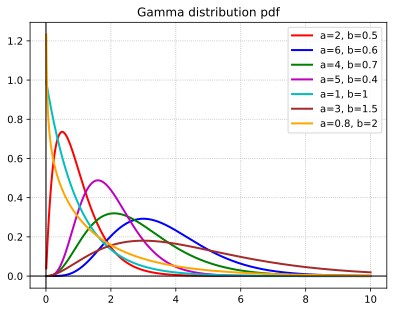

In [189]:
plot_gamma([(2, 0.5), (6, 0.6), (4, 0.7), (5, 0.4), (1, 1), (3, 1.5), (0.8, 2)])

### Beta distribution

A random variable $\xi$ has **beta distribution** $\mathrm{Beta}(\alpha, \beta)$, $\alpha, \beta > 0$, if

$$
    p_\xi(x) =  \frac 1{B(\alpha, \beta)} x^{\alpha - 1} (1-x)^{\beta -1}, \quad 0 < x < 1,
$$

where $B(\alpha, \beta) = \int\limits_0^1 x^{\alpha - 1} (1-x)^{\beta - 1}\,dx$.

In [174]:
from scipy.stats import beta
beta.rvs(a=0.5, b=3, size=5)

array([0.55526609, 0.16237011, 0.00894136, 0.57187144, 0.30754458])

In [163]:
def plot_beta(params):
    xs = np.linspace(0.001, 0.999, num=999)
    colors = ['r', 'b', 'g', 'm', 'c', 'brown', 'orange']
    for i, (a, b) in enumerate(params):
        plt.plot(xs, beta.pdf(xs, a, b), lw=2, c=colors[i], label=f"a={a}, b={b}")
    plt.grid(ls=":")
    plt.legend()
    plt.axhline(c='k', alpha=0.7)
    plt.axvline(c='k', alpha=0.7)
    plt.title("Beta distribution pdf")

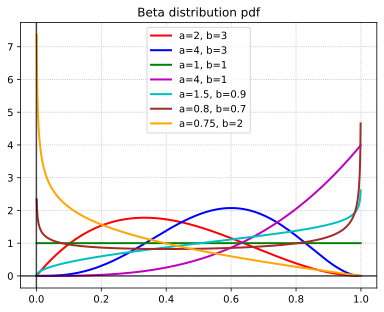

In [173]:
plot_beta([(2, 3), (4, 3), (1, 1), (4, 1), (1.5, 0.9), (0.8, 0.7), (0.75, 2)])

### Student $t$-distribution

A random variable $\xi$ has **Student $t$-distribution** with $\nu$ degrees of freedom if

$$
  p_\xi(x) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{x^2}\nu \right)^{-(\nu+1)/2}, \quad \nu > 0.
$$

This distribution is similar to $\mathcal N(0,1)$, but for small values of $\nu$ it has much heavier tails. Because of that $\mathbb V\xi$ does not exist if $\nu \leqslant 2$, and for $\nu \leqslant 1$ even $\mathbb E\xi$ does not exist. In other cases

$$
     \mathbb E \xi = 0, \quad \mathbb V \xi = \frac{\nu}{\nu-2}.
$$

In [188]:
from scipy.stats import t
print("Light tails:")
print(t(5).rvs(size=8))
print("Heavy tails:")
print(t(1).rvs(size=10))
print("Extremely heavy tails:")
print(t(0.2).rvs(size=4))

Light tails:
[-1.39280888 -1.77063342  0.30462518  1.17918526  1.60710925  0.50107176
 -0.91819257  0.23816698]
Heavy tails:
[ 0.33271793 -0.61532267  1.21954229 -1.25172938  2.13233276  0.49255856
 -1.37124132  0.39891305 41.97048293  3.65438293]
Extremely heavy tails:
[  -4.78187914 1499.42294631    9.88656295    3.26310129]


As $\nu \to +\infty$, $t$-distribution tends to $\mathcal N(0,1)$:

In [178]:
nu = 1002
t(nu).mean(), t(nu).var()

(0.0, 1.002)

### Laplace distribution


Pdf of **laplacian** random variable $\xi \sim \mathrm{Laplace}(\mu, b)$, $b > 0$, is

$$
   p_\xi(x) = \frac 1{2b} e^{-\frac{\vert x - \mu\vert}b}.
$$

If $\xi \sim \mathrm{Laplace}(\mu, b)$, then

$$
  \mathbb E \xi = \mu, \quad \mathbb V \xi = 2b^2.
$$

## Exercises

1. Choose all possible supports of the uniform distribution:
    * $\Omega = \varnothing$
    * $\Omega = \{1, 2, \ldots, n\}$
    * $\Omega = \mathbb N$
    * $\Omega = [a, b)$
    * $\Omega = [0, +\infty)$
    * $\Omega = \mathbb R$
    
2. Каждый день рекламу компании X в поисковой выдаче видят ровно $1000$ человек. Вчера $50$ из них кликнули на рекламу. С какой вероятностью не менее 50 людей кликнут на ее рекламу сегодня?

3. Известно, что на поисковой выдаче на рекламу компании X кликает в среднем примерно 50 пользователей в день. Количество показов достаточно большое и может меняться изо дня в день. С какой вероятностью сегодня будет совершено не менее 50 кликов по рекламным объявлениям?

4. Show then mean, median and mode of $\mathcal N(\mu, \sigma^2)$ are equal to $\mu$.

4. Find mode of $\mathrm{Gamma}(\alpha, \beta)$.

5. Find mode of $\mathrm{Beta}(\alpha, \beta)$.

6. Let $\xi_\nu \sim \mathrm{Student}(\nu)$, $\xi \sim \mathcal N(0, 1)$. Prove that $\xi_\nu \stackrel{D}{\to} \xi$ as $\nu \to +\infty$, i.e., 

    $$
        \lim\limits_{\nu \to +\infty}p_{\xi_\nu}(x) = p_\xi(x)  \text{ for all } x\in \mathbb R.
    $$

In [3]:
n = 1000
p = 0.05
lam = 50
from scipy.stats import binom, poisson
xi = binom(n, p)
eta = poisson(lam)
print("Binomial answer:", 1 - xi.cdf(49))
print("Poisson answer:", 1 - eta.cdf(49))

Binomial answer: 0.5202589429126758
Poisson answer: 0.5188083154720433
